In [1]:
import subprocess
import pandas
from pyplink import PyPlink
import pandas_plink as plink
import plinkio


simulate some genetic data for 10,000 individuals and 10,000 snps (using the function --make-snps) -> simulate genotype.  LDAK will generate SNPs in a very simple fashion, assuming Hardy-Weinberg equilibrium and linkage equilibrium. The default MAF range of SNPs is 0 to 0.5

In [2]:
command = "./ldak5.2.linux --make-snps simulation/sample/data  \
                --num-samples 10000 --num-snps 10000"
result = subprocess.run(command, shell=True, capture_output=True, text=True)

print(result.stdout)

-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
LDAK - Software for obtaining Linkage Disequilibrium Adjusted Kinships and Loads More
Version 5.2 - Help pages at http://www.ldak.org
-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --

There are 3 pairs of arguments:
--make-snps simulation/sample/data
--num-samples 10000
--num-snps 10000

-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --

Making genotypes for 10000 individuals and 10000 SNPs, each with 0.0100 <= MAF <= 0.5000 (change these limits using "--maf-low" and "--maf-high")

It appears this system has multiple processors available; to run the parallel version of LDAK, use "--max-threads" (this will only reduce runtime for some commands)

-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --

Making SNPs for Chunk 1 of 5
Making SNPs for Chunk 2 of 5
Making SNPs for Chunk 3 of 5
Making SNP

Generated 10,000 individuals and 10,000 SNPs.

The `--make-snps` command generated the following files (simulation/sample/*):

- `data.bed`: This binary file contains the actual genotype data. It encodes the genotypes for each individual at each SNP locus. This file is often accompanied by corresponding `.bim` and `.fam` files.


In [2]:
with PyPlink("simulation/sample/data") as bed:
    # Getting the BIM and FAM
    bim = bed.get_bim()
    fam = bed.get_fam()
print(bim.shape)
print(fam.shape)

(10000, 5)
(10000, 6)


In [3]:
bed._bed_format

'SNP-major'

In [5]:
bed_file_path = "simulation/sample/data"
bed = PyPlink.Plink(bed_file_path)

# Read and display the first few lines
num_lines_to_visualize = 10

for i, row in enumerate(bed):
    if i < num_lines_to_visualize:
        print(row)
    else:
        break

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xbe in position 3: invalid start byte


- `data.fam`: contains information about the individuals. It includes columns for family ID, individual ID, father's ID, mother's ID, sex, and phenotype information. The .fam file is used to specify the sample and family structure.

- `data.progress`: -

In [4]:
fam.head()

,fid,iid,father,mother,gender,status
0,IND1,IND1,0,0,0,0
1,IND2,IND2,0,0,0,0
2,IND3,IND3,0,0,0,0
3,IND4,IND4,0,0,0,0
4,IND5,IND5,0,0,0,0


In [5]:
fam.status.unique()

array([0])


- `data.bim`: This file contains information about the genetic variants (SNPs). Includes columns for SNP ID, chromosome, genetic position, base pair position, allele 1, and allele 2.


In [6]:
bim.head()

,chrom,pos,cm,a1,a2
snp,,,,,
SNP1,1,1000,0,A,B
SNP2,1,2000,0,A,B
SNP3,1,3000,0,A,B
SNP4,1,4000,0,A,B
SNP5,1,5000,0,A,B


2. Simulate some phenotypes using the `--make-phenos` function with the following parameters:

- `power`: Specifies how predictors are scaled.
- `her`: Represents the proportion of total phenotypic variation explained by the genetic contribution.
- `num-causals`: Used to specify the number of predictors contributing to each phenotype. To indicate that all predictors are causal, you can use the value `-1`.

For example:

```bash
--make-phenos --power <power_value> --her <heritability_value> --num-causals <num_causals_value>


In [7]:
command = "./ldak5.2.linux --make-phenos simulation/pheno/pheno \
                --bfile simulation/sample/data \
                --ignore-weights YES \
                --power 0 \
                --her 0.5 \
                --num-phenos 1 \
                --num-causals 1000 "
result = subprocess.run(command, shell=True, capture_output=True, text=True)

print(result.stdout)

-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
LDAK - Software for obtaining Linkage Disequilibrium Adjusted Kinships and Loads More
Version 5.2 - Help pages at http://www.ldak.org
-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --

There are 7 pairs of arguments:
--make-phenos simulation/pheno/pheno
--bfile simulation/sample/data
--ignore-weights YES
--power 0
--her 0.5
--num-phenos 1
--num-causals 1000

-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --

Making 1 phenotype, with heritability 0.5000 and 1000 causal predictors

Predictors will be centred, but not scaled (option "--power")

Causal predictors will be picked at random; if you would prefer to specify them, use "--causals"

Effect sizes (for scaled predictors) will be drawn from a Gaussian distribution; if you would prefer to specify them, use "--effects"

To generate a binary phenotype, use "--prev" to provide th

In [8]:
print("GENETIC CONTRIBUTIONS")
print(subprocess.run("head simulation/pheno/pheno.breed", shell=True, capture_output=True, text=True).stdout)
print("PHENOTYPES WITH THE DESIRED HERITABILITY")
print(subprocess.run("head simulation/pheno/pheno.pheno", shell=True, capture_output=True, text=True).stdout)

GENETIC CONTRIBUTIONS
IND1 IND1 0.654920 
IND2 IND2 -1.275015 
IND3 IND3 -0.161438 
IND4 IND4 0.486741 
IND5 IND5 -1.362700 
IND6 IND6 0.516223 
IND7 IND7 0.508072 
IND8 IND8 -0.876456 
IND9 IND9 -1.769928 
IND10 IND10 -0.549114 

PHENOTYPES WITH THE DESIRED HERITABILITY
IND1 IND1 -0.214814 
IND2 IND2 -2.336720 
IND3 IND3 -0.876664 
IND4 IND4 0.633135 
IND5 IND5 -0.838533 
IND6 IND6 1.043405 
IND7 IND7 -1.537204 
IND8 IND8 -1.449986 
IND9 IND9 -2.390066 
IND10 IND10 -0.679833 



In [9]:
print("LIST OF CAUSAL PREDICTORS")
print(subprocess.run("head simulation/pheno/pheno.effects", shell=True, capture_output=True, text=True).stdout)


LIST OF CAUSAL PREDICTORS
Phenotype Predictor A1 A2 Centre Effect Var_Explained
1 SNP4 A B 0.380200 -0.050833 0.000779
1 SNP15 A B 0.584100 0.049363 0.001002
1 SNP17 A B 0.459200 -0.020317 0.000147
1 SNP24 A B 0.037300 -0.020219 0.000015
1 SNP70 A B 0.263600 0.012140 0.000033
1 SNP90 A B 0.419900 0.034600 0.000396
1 SNP97 A B 0.904600 -0.017461 0.000153
1 SNP113 A B 0.331000 0.000348 0.000000
1 SNP153 A B 1.002400 -0.014597 0.000107



In [10]:
subprocess.run("head -n 9000 sii/sample/data.fam > test/training.fam", shell=True, capture_output=True, text=True)
subprocess.run("head -n 9000 test/sample/data.bed > test/training.bed", shell=True, capture_output=True, text=True)
subprocess.run("head -n 9000 test/sample/data.bim > test/training.bim", shell=True, capture_output=True, text=True)

subprocess.run("tail -n 1000 test/sample/data.fam > test/test.fam", shell=True, capture_output=True, text=True)
subprocess.run("tail -n 1000 test/sample/data.bed > test/test.bed", shell=True, capture_output=True, text=True)
subprocess.run("tail -n 1000 test/sample/data.bim > test/test.bim", shell=True, capture_output=True, text=True)

CompletedProcess(args='tail -n 1000 test/sample/data.bim > test/test.bim', returncode=2, stdout='', stderr='/bin/sh: 1: cannot create test/test.bim: Directory nonexistent\n')

Classical linear regression.

In [11]:
command = "./ldak5.2.linux --linear simulation/linreg/linreg --bfile simulation/sample/data --pheno simulation/pheno/pheno.pheno --remove simulation/subsets/test.fam"
result = subprocess.run(command, shell=True, capture_output=True, text=True)

print(result.stdout)

-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
LDAK - Software for obtaining Linkage Disequilibrium Adjusted Kinships and Loads More
Version 5.2 - Help pages at http://www.ldak.org
-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --

There are 4 pairs of arguments:
--linear simulation/linreg/linreg
--bfile simulation/sample/data
--pheno simulation/pheno/pheno.pheno
--remove simulation/subsets/test.fam

-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --

Performing (standard) linear regression (to instead perform mixed model linear regression, use "--grm")

To additionally compute test statistics via a saddlepoint approximation, add "--spa-test YES"

To perform weighted linear regression, use "--sample-weights"

Will use the standard estimator of effect size variance; to switch to the sandwich estimator use "--sandwich YES"

Consider using "--covar" to provide covariates

Consi

In [12]:
scores = subprocess.run("./ldak5.2.linux --calc-scores simulation/scores/scores \
                --scorefile simulation/linreg/linreg.score \
                --bfile simulation/sample/data \
                --pheno simulation/pheno/pheno.pheno \
                --power 0 \
                --remove simulation/subsets/test.fam", shell=True, capture_output=True, text=True)
print(scores.stdout)

-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
LDAK - Software for obtaining Linkage Disequilibrium Adjusted Kinships and Loads More
Version 5.2 - Help pages at http://www.ldak.org
-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --

There are 6 pairs of arguments:
--calc-scores simulation/scores/scores
--scorefile simulation/linreg/linreg.score
--bfile simulation/sample/data
--pheno simulation/pheno/pheno.pheno
--power 0
--remove simulation/subsets/test.fam

-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --

Calculating scores for 7 profiles

Predictors will be centred, but not scaled (option "--power")

To include covariates and/or envronmental variables, use "--covar" and/or "--enviro"

If you require counts (how many predictors contributed to each profile) add "--save-counts"

It appears this system has multiple processors available; to run the parallel version of LDAK, u

The scores.profile -> contains 7 profiles corresponding to the 7 pvalues in linreg. vLinear combinations of predictor values

In [13]:
print(subprocess.run("head simulation/scores/scores.profile", shell=True, capture_output=True, text=True).stdout)

ID1	ID2	Phenotype	Covariates	Profile_1	BLANK	Profile_2	BLANK	Profile_3	BLANK	Profile_4	BLANK	Profile_5	BLANK	Profile_6	BLANK	Profile_7	BLANK	
IND1	IND1	-0.214814	0.000000	-1.549002	NA	-0.947467	NA	0.277148	NA	0.300567	NA	0.585900	NA	0.258970	NA	0.091831	NA	
IND2	IND2	-2.336720	0.000000	-2.003199	NA	-0.875819	NA	-0.798747	NA	-0.550785	NA	-0.467424	NA	-0.044812	NA	0.282380	NA	
IND3	IND3	-0.876664	0.000000	-1.466446	NA	-0.450203	NA	-0.173720	NA	-0.346020	NA	-0.098554	NA	-0.212810	NA	-0.208994	NA	
IND4	IND4	0.633135	0.000000	2.705076	NA	1.615982	NA	0.964579	NA	0.939570	NA	0.140435	NA	0.389528	NA	0.296494	NA	
IND5	IND5	-0.838533	0.000000	-2.176325	NA	-2.552728	NA	-1.803565	NA	-1.282393	NA	-0.499342	NA	-0.424200	NA	-0.133305	NA	
IND6	IND6	1.043405	0.000000	2.087223	NA	1.097579	NA	1.143910	NA	0.250157	NA	0.183572	NA	0.080986	NA	-0.095044	NA	
IND7	IND7	-1.537204	0.000000	-0.036752	NA	1.221552	NA	1.185528	NA	0.850122	NA	0.885318	NA	0.712350	NA	0.036935	NA	
IND8	IND8	-1.449986	0.000000	-2.547347

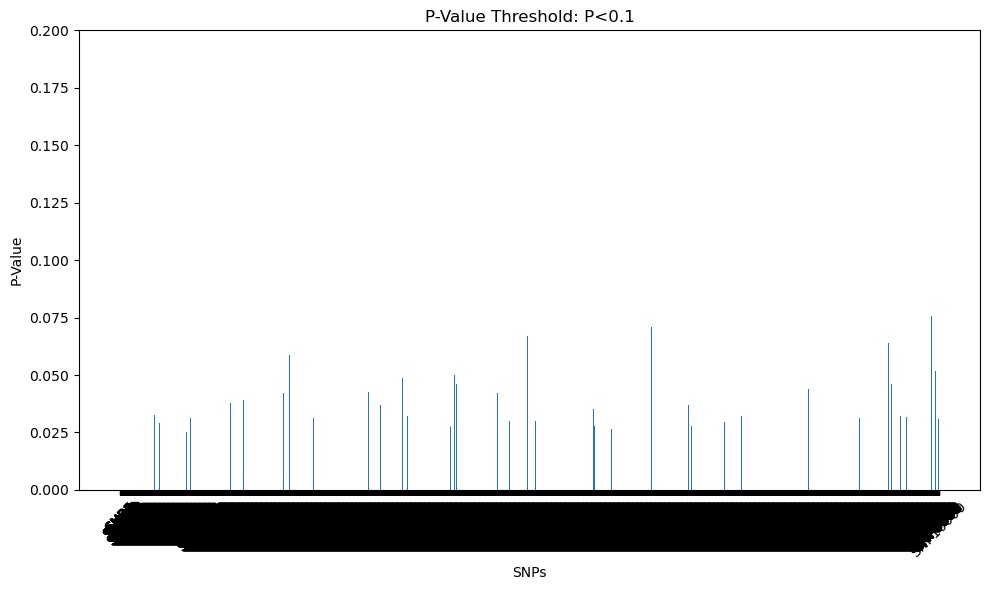

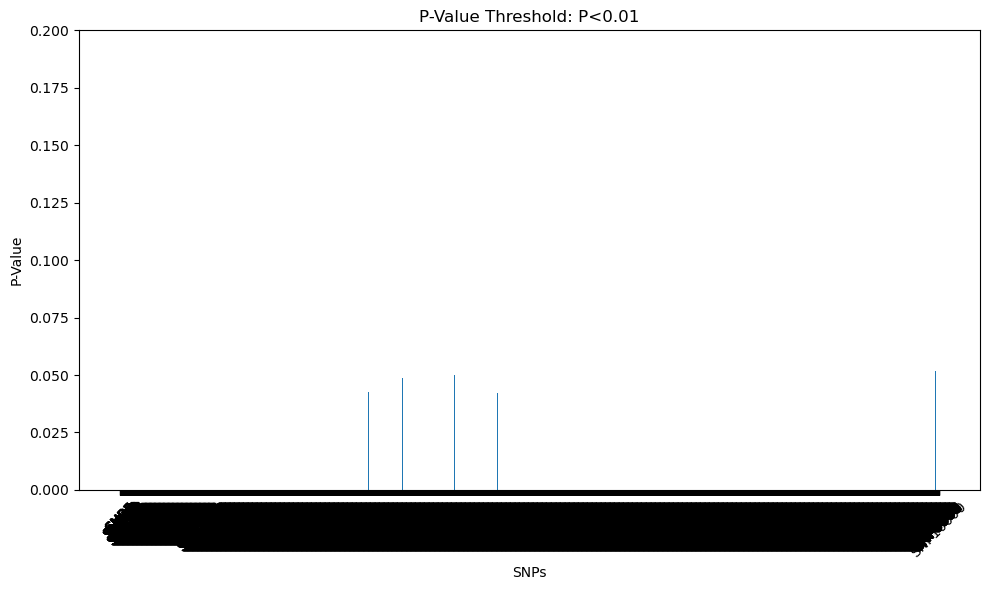

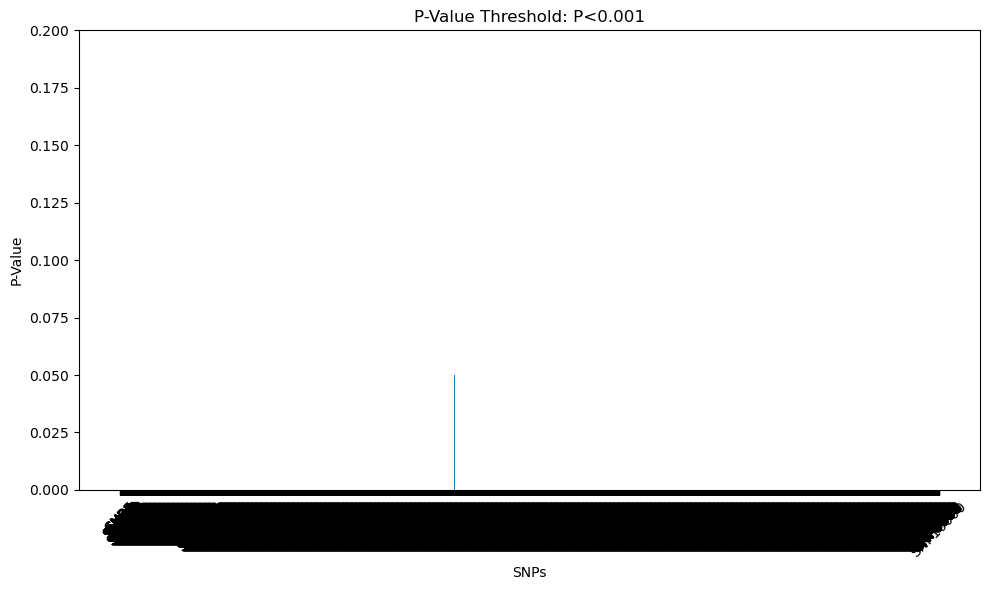

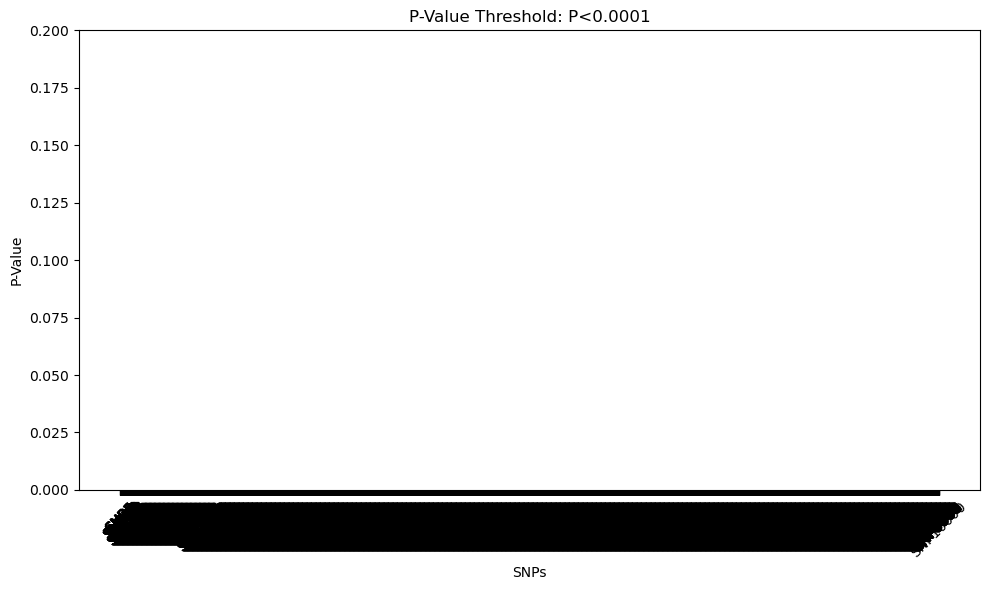

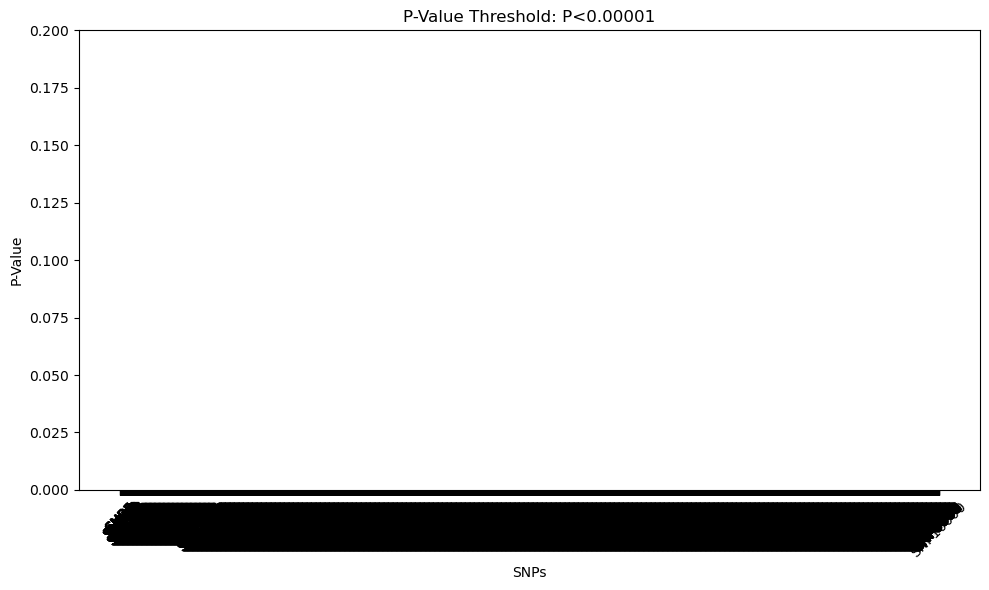

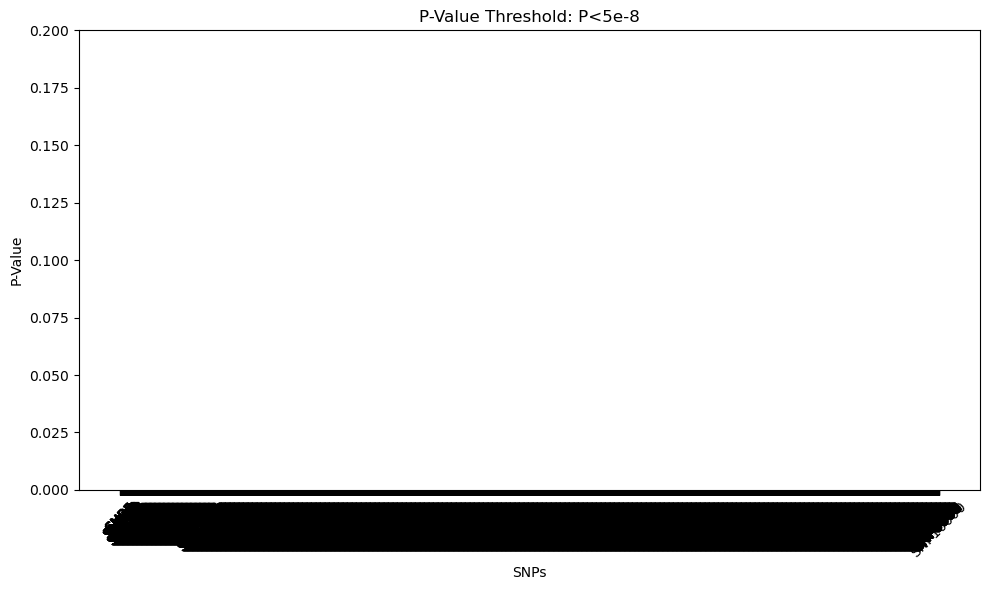

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the file into a DataFrame
data = pd.read_csv('simulation/linreg/linreg.score', delim_whitespace=True)

# List of p-value thresholds to create plots for
p_value_thresholds = ['P<0.1', 'P<0.01', 'P<0.001', 'P<0.0001', 'P<0.00001', 'P<5e-8']

# Loop through each p-value threshold and create a plot
for p_value_threshold in p_value_thresholds:
    # Filter the data for the current p-value threshold
    filtered_data =data[['Predictor',p_value_threshold]]

    # Create a bar plot with SNPs on the x-axis and p-values on the y-axis
    plt.figure(figsize=(10, 6))
    plt.bar(filtered_data['Predictor'], filtered_data[p_value_threshold])
    plt.xlabel('SNPs')
    plt.ylim(0,0.2)
    plt.ylabel('P-Value')
    plt.title(f'P-Value Threshold: {p_value_threshold}')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Save the plot as an image (you can change the format and filename as needed)
    #plt.savefig(f'p_value_plot_{p_value_threshold}.png')

    # Optionally, display the plot
    plt.show()

    # Close the current plot to avoid overlapping plots
    plt.close()
